In [1]:
import pandas as pd
df = pd.read_csv('/content/Nepal_Crop_main.csv')
df.head()

,Area,Item,Year,hg/ha_yield,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes
0,Nepal,Maize,1990,16246,13.67,1403.23,60.11
1,Nepal,Maize,1991,15976,13.55,1146.81,60.11
2,Nepal,Maize,1992,16647,13.34,1035.01,60.11
3,Nepal,Maize,1993,15984,13.77,1111.87,60.11
4,Nepal,Maize,1994,16502,13.86,1148.53,60.11


In [2]:
df.shape

(198, 7)

In [3]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'avg_temp',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes'],
      dtype='object')

In [4]:
#different type of crops in nepal
crops_in_nepal = df['Item'].unique()

print('Different types of crops in Nepal')
for crop in crops_in_nepal:
  print(crop)

Different types of crops in Nepal
Maize
Millet
Potatoes
Rice
Soya beans
Wheat


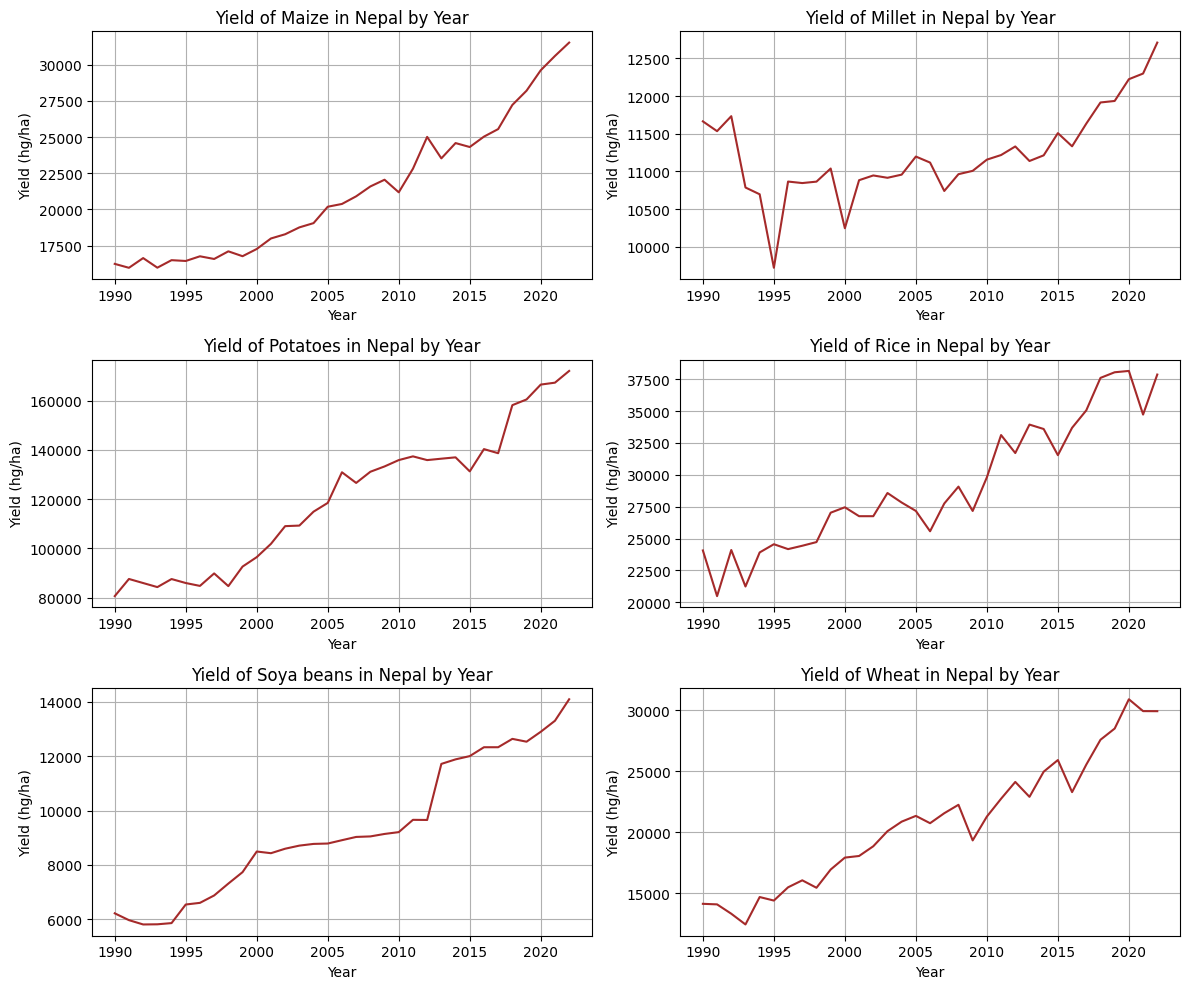

In [5]:
import matplotlib.pyplot as plt

def crop_yield_by_year(df, crop):
    # Filter the DataFrame for the specified crop
    crop_df = df[df['Item'] == crop]

    # Group by year and calculate the mean yield
    yield_by_year = crop_df.groupby('Year')['hg/ha_yield'].mean()

    # Plot yield by year
    plt.plot(yield_by_year.index, yield_by_year.values, color='brown')
    plt.title(f'Yield of {crop} in Nepal by Year')
    plt.xlabel('Year')
    plt.ylabel('Yield (hg/ha)')
    plt.grid(True)

# List of crops
crops = ['Maize','Millet','Potatoes', 'Rice', 'Soya beans', 'Wheat']

plt.figure(figsize=(12, 10))
for i, crop in enumerate(crops, 1):
    plt.subplot(3, 2, i)
    crop_yield_by_year(df, crop)

plt.tight_layout()
plt.show()


In [6]:
df.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
avg_temp                         float64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
dtype: object

<ipython-input-7-98fdbf9f8ae2>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


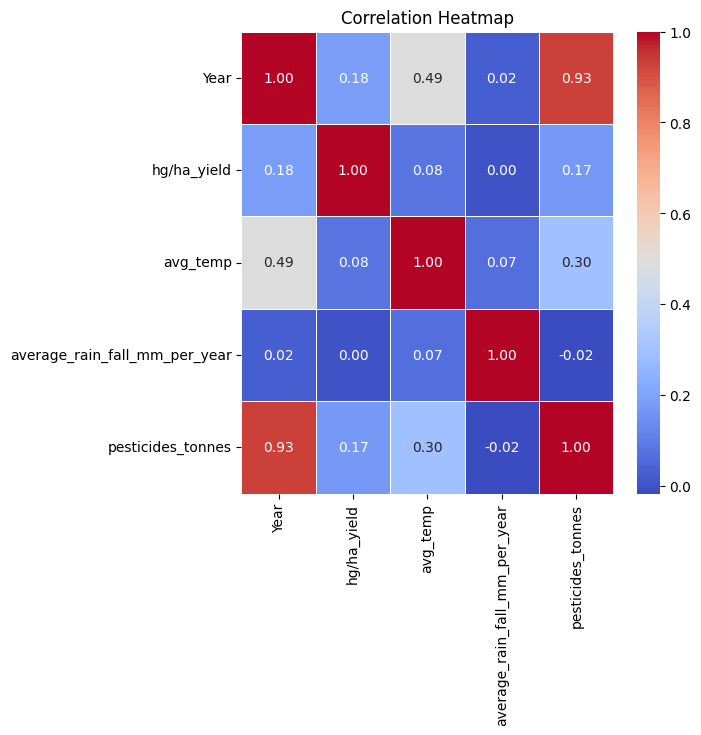

In [7]:
import seaborn as sns

# Compute correlations
correlations = df.corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


* Strong positive correlation with 'pesticides_tonnes' (0.929), indicating that the amount of pesticides used tends to increase over the years.
* Positive correlation with 'avg_temp' (0.494), suggesting that average temperature tends to increase over the years.
* Weak positive correlation with 'hg/ha_yield' (0.182), indicating a slight tendency for crop yield to increase over the years.
* Weak positive correlation with 'average_rain_fall_mm_per_year' (0.023), suggesting a very slight tendency for average rainfall to increase over the years.

In [8]:
#get the corelation coefficient for each variables inthe tabular format
from google.colab import data_table
data_table.DataTable(correlations)

,Year,hg/ha_yield,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes
Year,1.000000,0.182109,0.494440,0.023914,0.929155
hg/ha_yield,0.182109,1.000000,0.080939,0.000111,0.171596
avg_temp,0.494440,0.080939,1.000000,0.065585,0.295316
average_rain_fall_mm_per_year,0.023914,0.000111,0.065585,1.000000,-0.017115
pesticides_tonnes,0.929155,0.171596,0.295316,-0.017115,1.000000


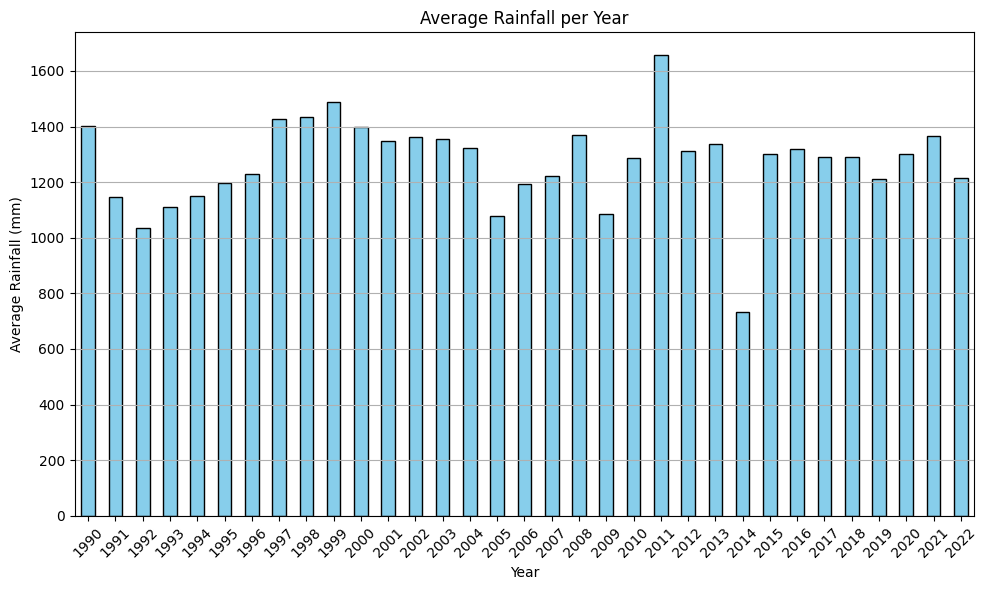

Average Rainfall over 32 Years: 1271.9257575757574 mm


In [9]:
# Calculate average rainfall per year
average_rainfall_per_year = df.groupby('Year')['average_rain_fall_mm_per_year'].mean()

# Plot bar graph
plt.figure(figsize=(10, 6))
average_rainfall_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per Year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Calculate average rainfall over the 32 years (1990 - 2022)
average_rainfall_overall = df['average_rain_fall_mm_per_year'].mean()

print("Average Rainfall over 32 Years:", average_rainfall_overall, "mm")



Provides the average rainfall over the year from 1990 to 2022. The lowest rainfall was in 2014 and the the highest rainfall was in 2011.. Average Rainfall over 32 Years is 1271.92 mm

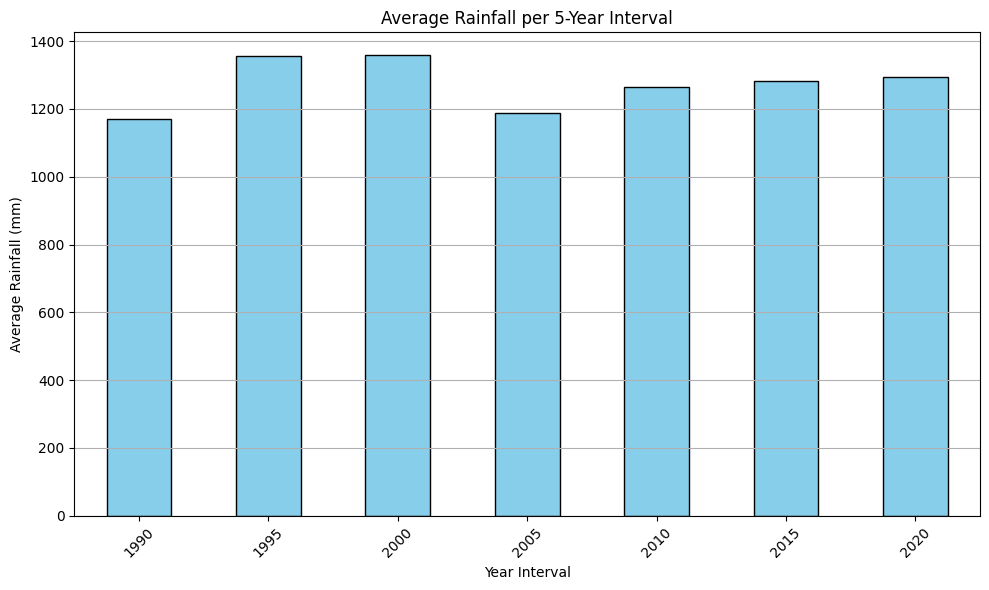

In [10]:
import matplotlib.pyplot as plt

# Grouping data into 5-year intervals and calculating average rainfall
df['Year_interval'] = (df['Year'] // 5) * 5  # Create 5-year intervals
average_rainfall_per_interval = df.groupby('Year_interval')['average_rain_fall_mm_per_year'].mean()

# Plot bar graph
plt.figure(figsize=(10, 6))
average_rainfall_per_interval.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Year Interval')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall per 5-Year Interval')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


This plot show the average rainfall per five year interval.

In [11]:
# sns.pairplot(data=df,hue='Item',kind='scatter',palette='BrBG')

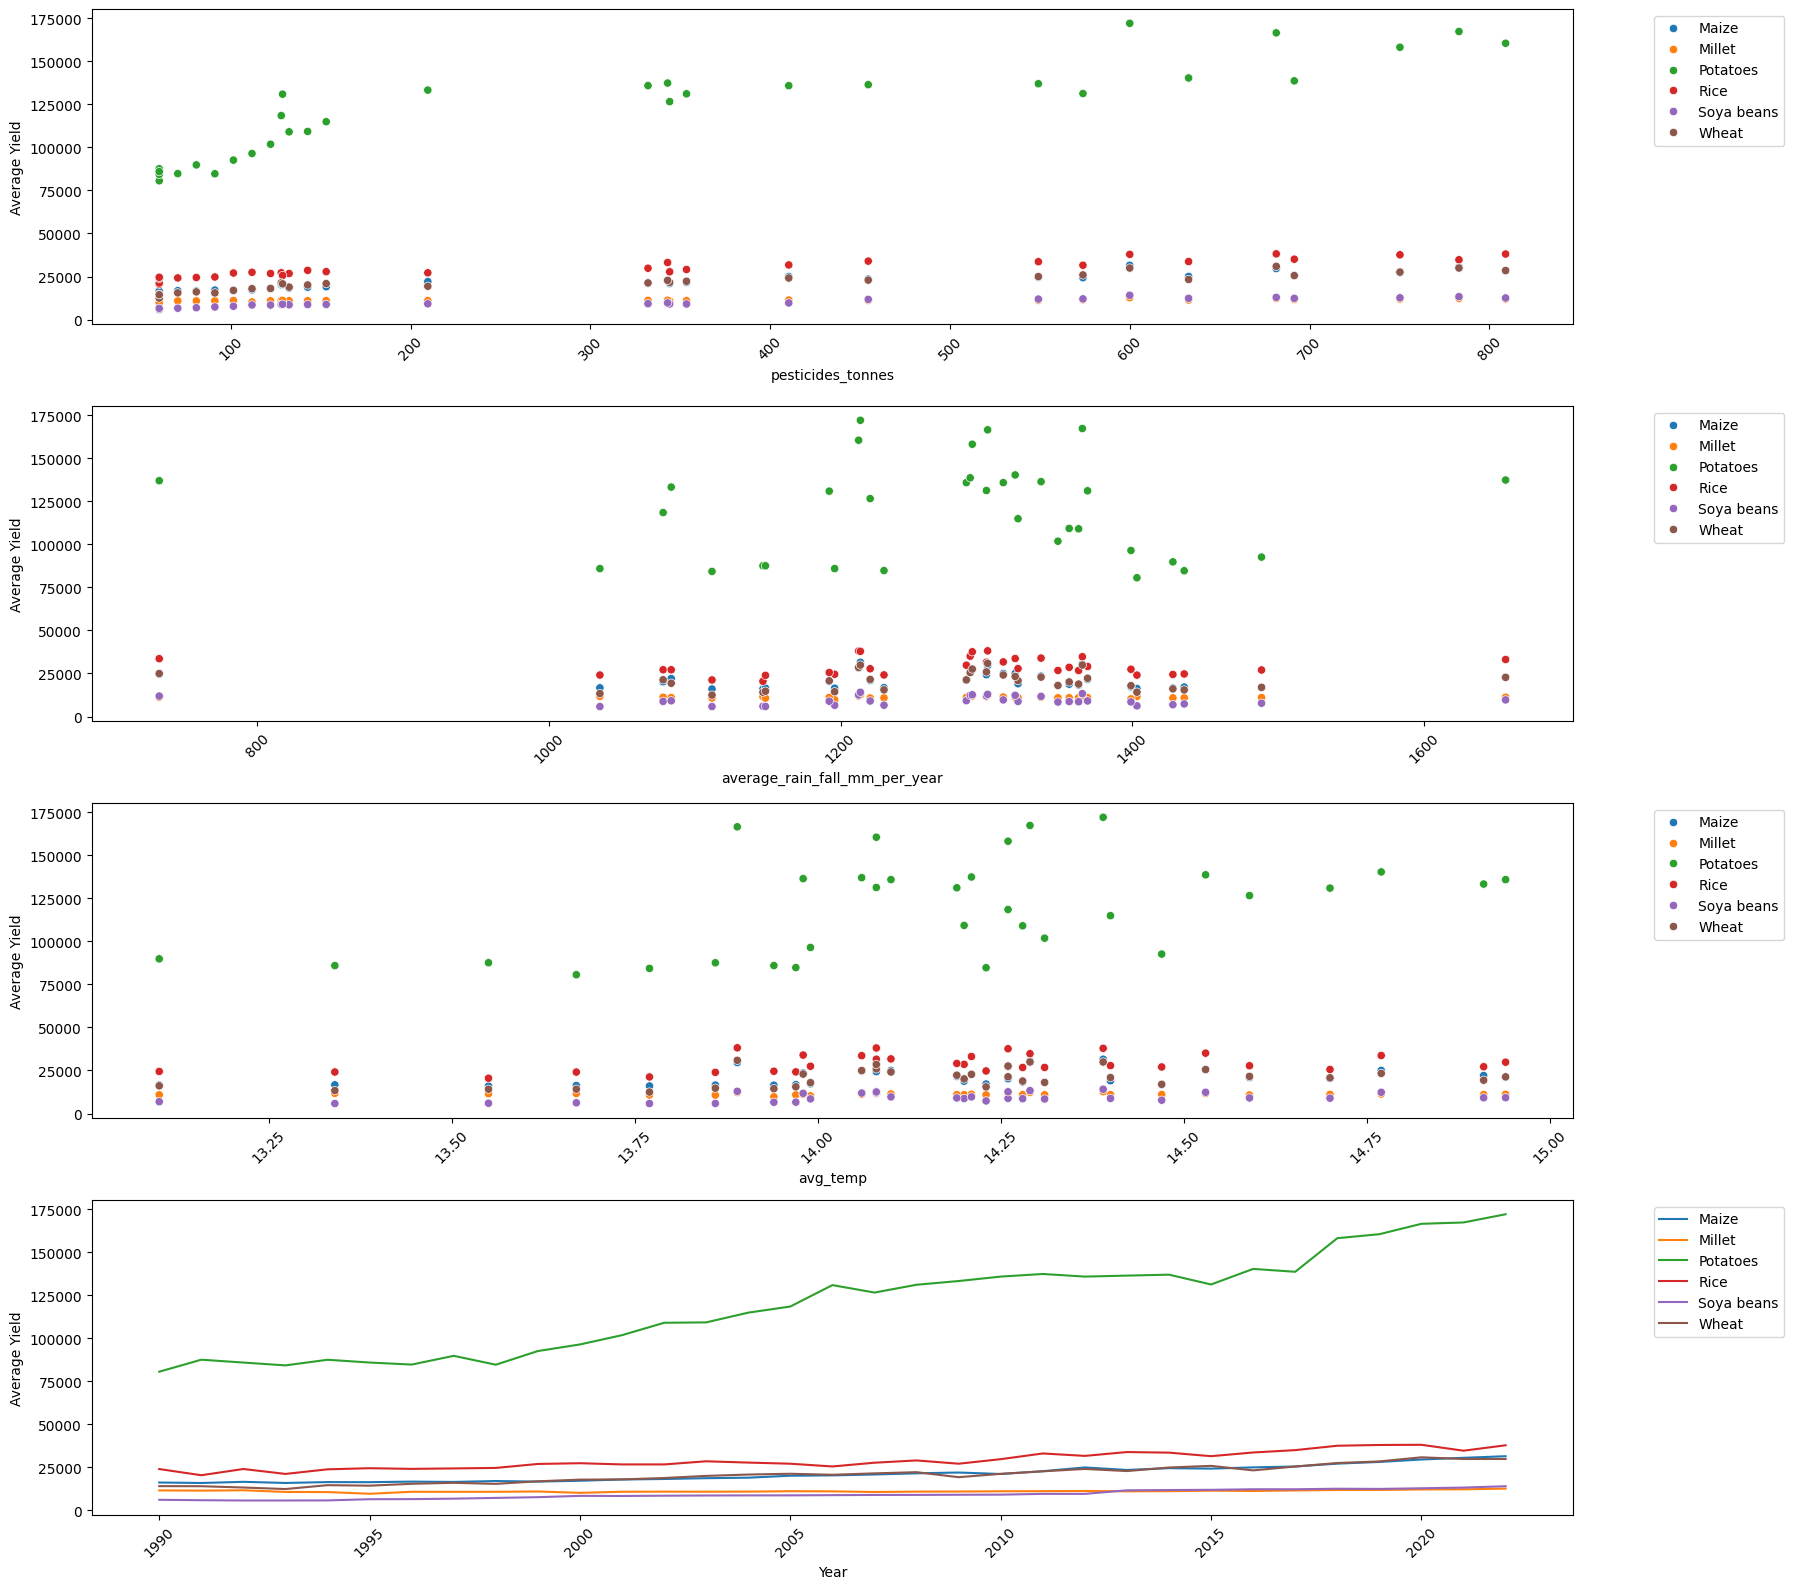

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(18,16))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[0], legend = True, palette='tab10')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[1], legend = True, palette='tab10')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[2], legend = True, palette='tab10')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "Year", y = "hg/ha_yield", hue = "Item", data = df, ax=axes[3], legend = True, palette='tab10')
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_ylabel('Average Yield')
axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


*  The first subplot visualizes the relationship between the amount of pesticides used (x-axis) and the average crop yield (y-axis). Each data point represents a specific crop item, differentiated by color.

*  The Second Subplot gives the relationships between average rainfall vs the average crop yields.

*  The third subplot gives the relationship between average temprature and crop yield

*  The fourth subplot gives the relatiships between years and average yields for the crops

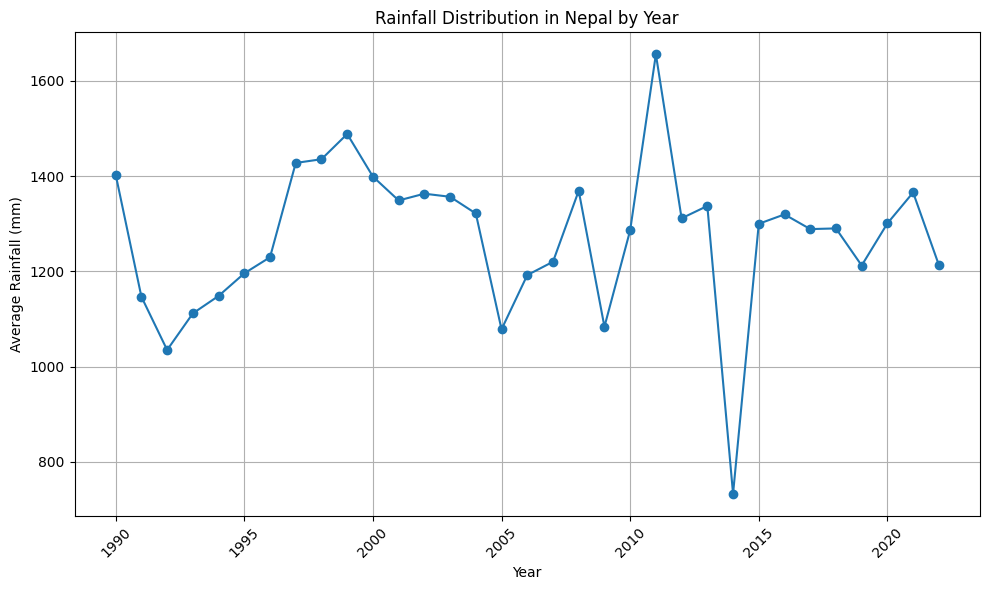

In [13]:
# Calculate average rainfall per year for Nepal
average_rainfall_per_year = df.groupby('Year')['average_rain_fall_mm_per_year'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_rainfall_per_year.index, average_rainfall_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Rainfall Distribution in Nepal by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

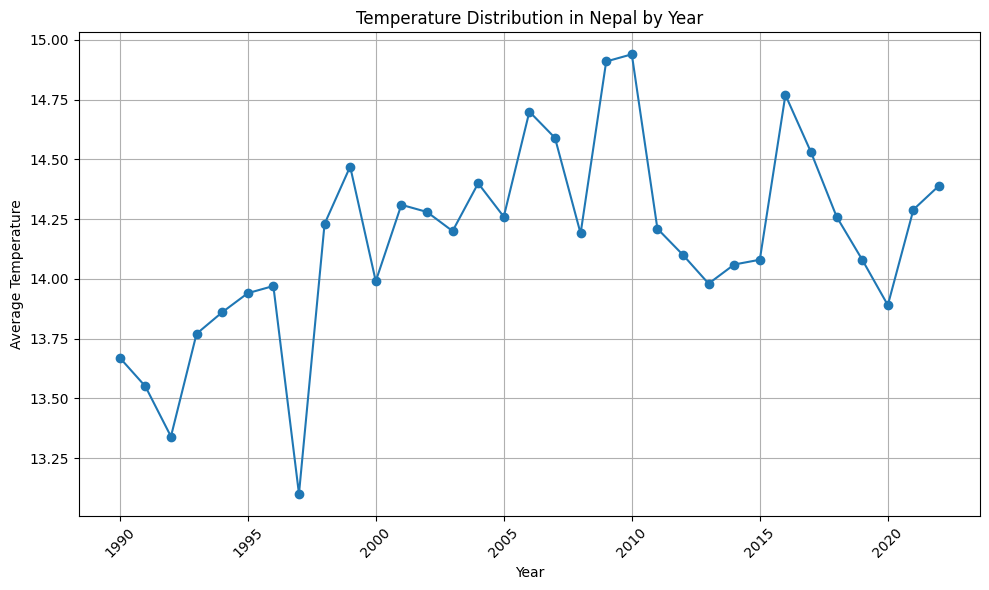

In [14]:
# Calculate average temp per year for Nepal
average_temp_per_year = df.groupby('Year')['avg_temp'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_temp_per_year.index, average_temp_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Temperature Distribution in Nepal by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

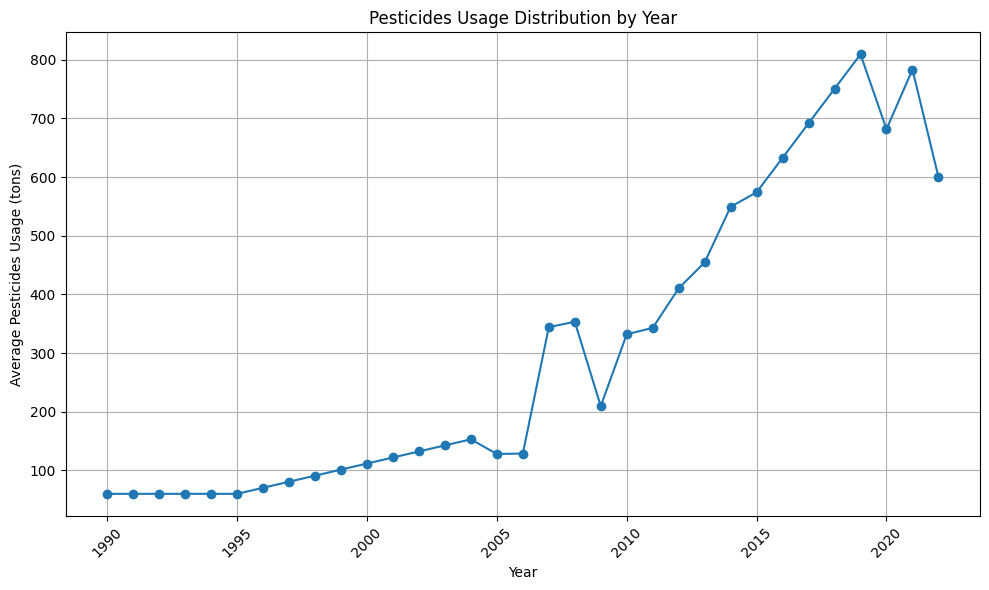

In [15]:
# Calculate average pesticides usage per year
average_pesticides_per_year = df.groupby('Year')['pesticides_tonnes'].mean()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(average_pesticides_per_year.index, average_pesticides_per_year.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Pesticides Usage (tons)')
plt.title('Pesticides Usage Distribution by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


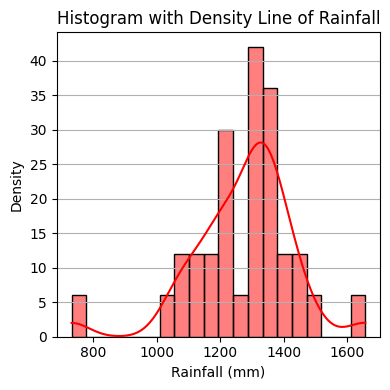

In [16]:
# Create histogram with density line
plt.figure(figsize=(4, 4))
sns.histplot(df['average_rain_fall_mm_per_year'], bins=20, kde=True, color='red', edgecolor='black')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.title('Histogram with Density Line of Rainfall')
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()
plt.show()



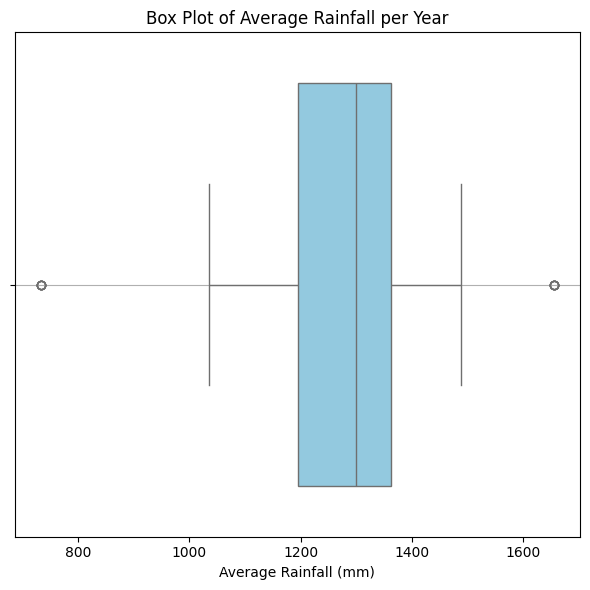

In [17]:
# Create box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x='average_rain_fall_mm_per_year', data=df, color='skyblue')
plt.xlabel('Average Rainfall (mm)')
plt.title('Box Plot of Average Rainfall per Year')
plt.grid(axis='y')  # Add grid lines only on the y-axis
plt.tight_layout()
plt.show()


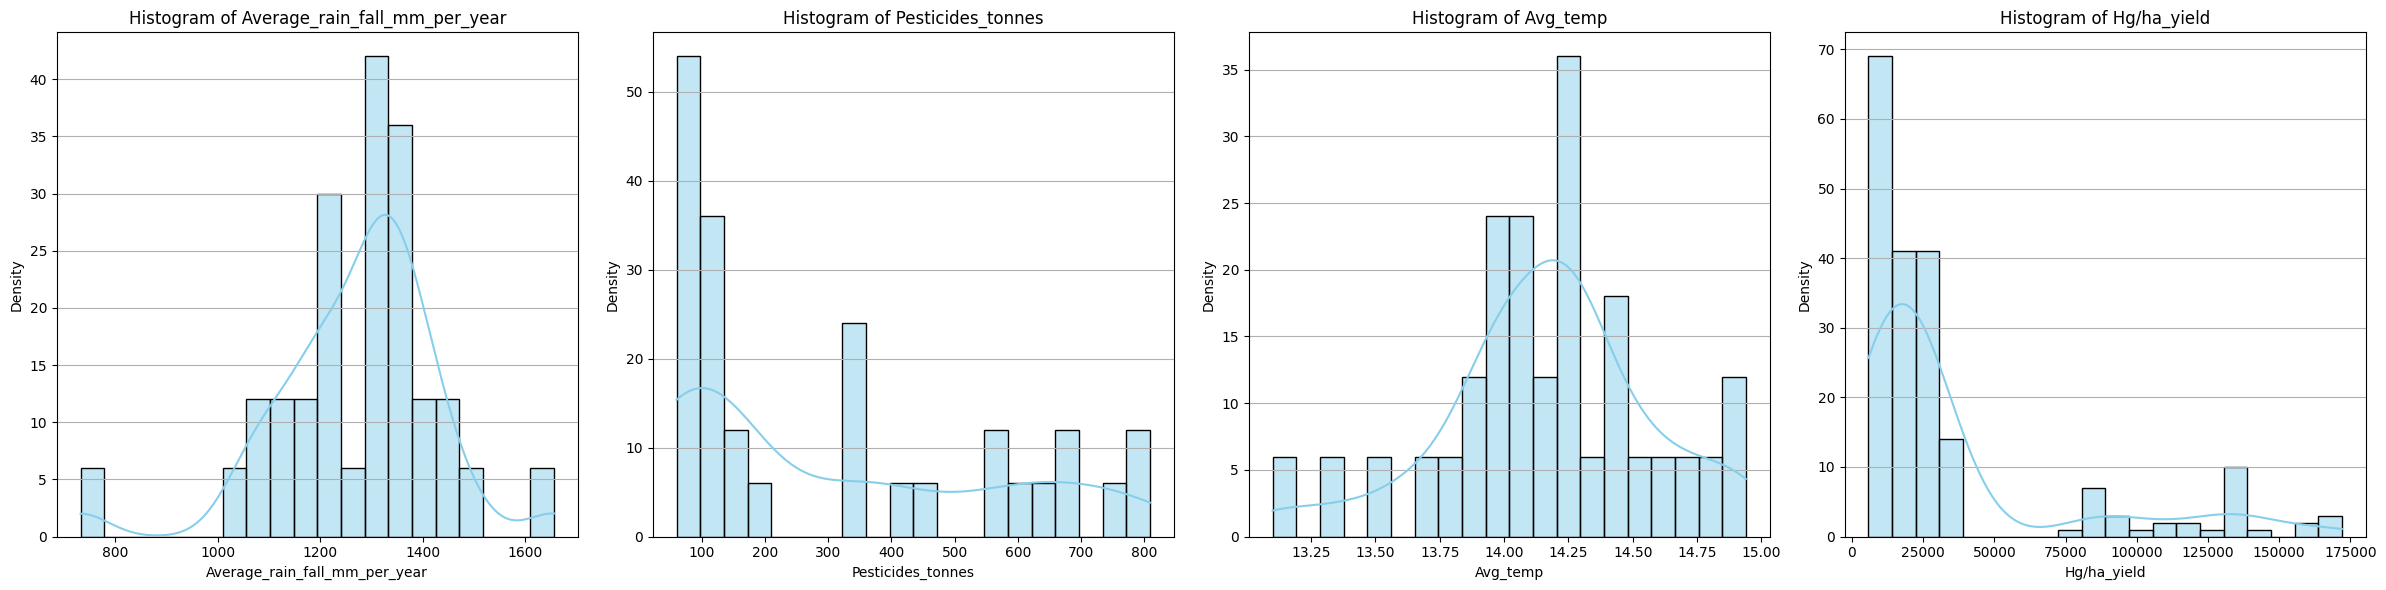

In [18]:
def plot_histograms(df, variables):
    """
    Plot histograms for the specified variables in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        variables (list): A list of variable names for which histograms are to be plotted.
    """
    # Set up the figure and axes
    num_variables = len(variables)
    fig, axes = plt.subplots(1, num_variables, figsize=(6*num_variables, 6))

    # Plot histograms for each variable
    for i, var in enumerate(variables):
        sns.histplot(df[var], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
        axes[i].set_xlabel(var.capitalize())  # Set x-axis label
        axes[i].set_ylabel('Density')  # Set y-axis label
        axes[i].set_title(f'Histogram of {var.capitalize()}')  # Set title
        axes[i].grid(axis='y')  # Add grid lines only on the y-axis

    plt.tight_layout()
    plt.show()

# Example usage:
# Define the list of variables to plot
variables_to_plot = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp','hg/ha_yield']

# Call the function to plot histograms for the specified variables
plot_histograms(df, variables_to_plot)


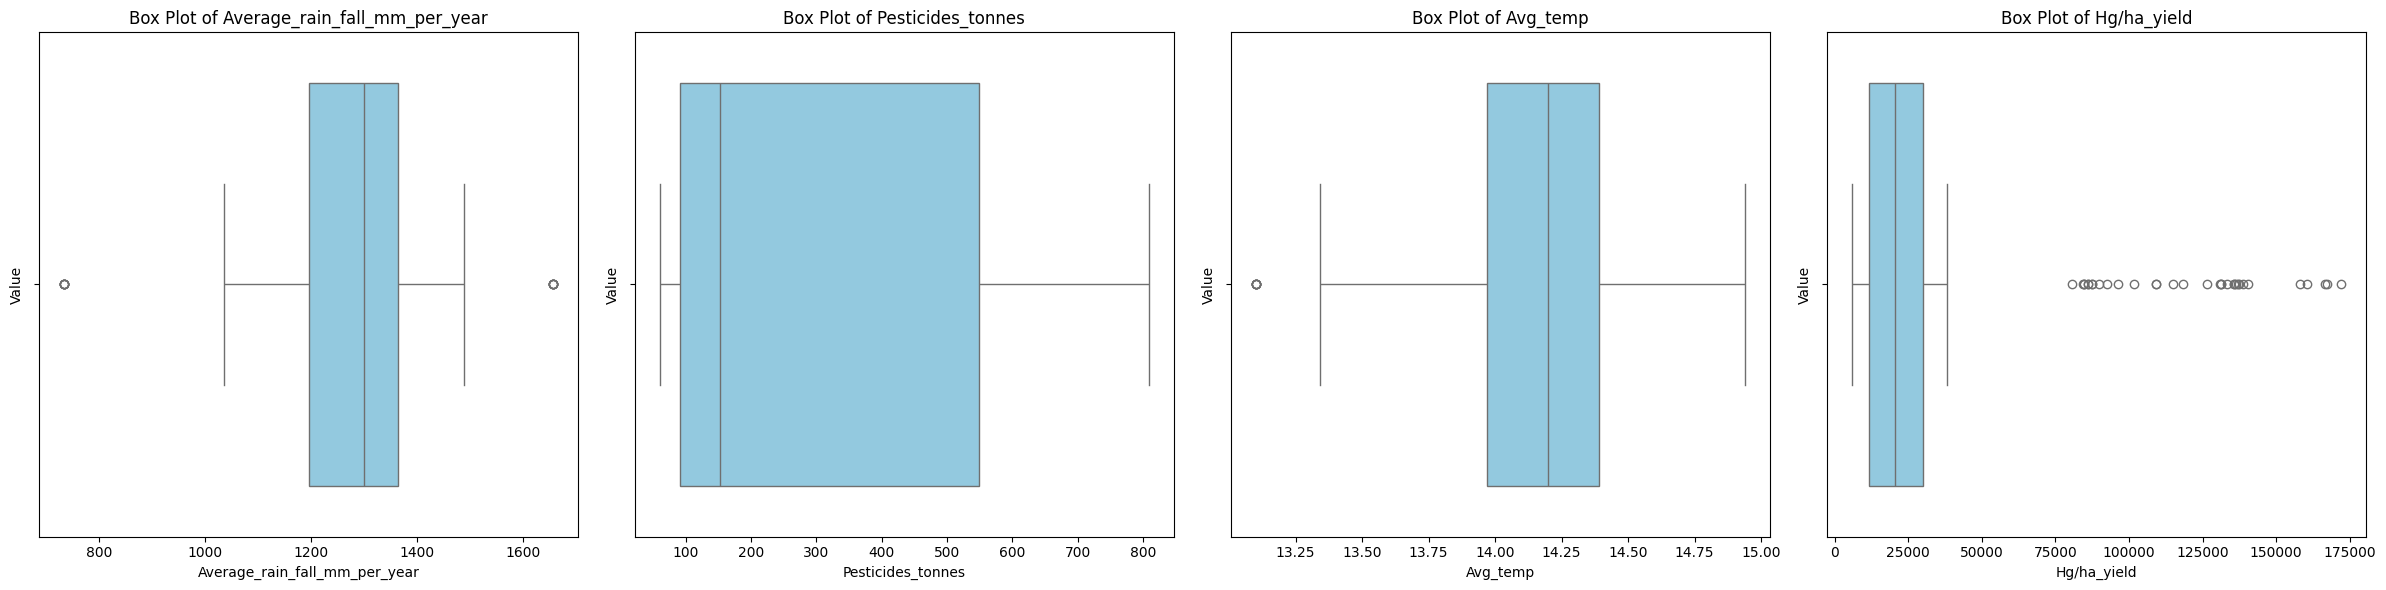

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot(df, variables):
    """
    Plot box plots for the specified variables in the DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        variables (list): A list of variable names for which box plots are to be plotted.
    """
    # Set up the figure and axes
    num_variables = len(variables)
    fig, axes = plt.subplots(1, num_variables, figsize=(6*num_variables, 6))

    # Plot box plots for each variable
    for i, var in enumerate(variables):
        sns.boxplot(x=var, data=df, ax=axes[i], color='skyblue')
        axes[i].set_xlabel(var.capitalize())  # Set x-axis label
        axes[i].set_ylabel('Value')  # Set y-axis label
        axes[i].set_title(f'Box Plot of {var.capitalize()}')  # Set title

    plt.tight_layout()
    plt.show()

# Example usage:
# Define the list of variables to plot
variables_to_plot = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']

# Call the function to plot box plots for the specified variables
plot_boxplot(df, variables_to_plot)


# Regression Analysis

Perform regression analysis to model the relationship between crop yield and various factors such as rainfall, temperature, and pesticide usage.


Evaluate the significance and strength of these relationships using regression coefficients and goodness-of-fit measures.

In [20]:
df1 = df.copy()

In [21]:
import statsmodels.api as sm

# Define the independent variables (predictors) and the dependent variable (response)
X = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']]
y = df['hg/ha_yield']

# Add a constant term to the independent variables to fit the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            hg/ha_yield   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.031
Date:                Thu, 21 Mar 2024   Prob (F-statistic):              0.111
Time:                        08:18:33   Log-Likelihood:                -2376.9
No. Observations:                 198   AIC:                             4762.
Df Residuals:                     194   BIC:                             4775.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the independent variables (predictors) and the dependent variable (response)
X = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']]
y = df['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
ssr = np.sum((y_pred - y_mean) ** 2)
r_squared = ssr / sst

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Print model summary with rounded values
coefficients_str = [f"{coeff:.2f}" for coeff in model.coef_]
print("Model Coefficients:", ", ".join(coefficients_str))
print("Intercept:", f"{model.intercept_:.2f}")
print("Mean Squared Error (MSE):", f"{mse:.2f}")
print("R-squared:", f"{r_squared:.2f}")
print("Adjusted R-squared:", f"{adj_r_squared:.2f}")

Model Coefficients: 3.92, 6994.49, 35.08
Intercept: -79224.85
Mean Squared Error (MSE): 1679151823.67
R-squared: 0.07
Adjusted R-squared: -0.01


In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(158, 3) (40, 3) (158,) (40,)


For the predictor variables:
```
# The coefficient for 'average_rain_fall_mm_per_year' is approximately 3.92.
# The coefficient for 'avg_temp' is approximately 6994.49.
# The coefficient for 'pesticides_tonnes' is approximately 35.08.
```


These coefficients represent the change in the dependent variable ('hg/ha_yield') for a one-unit change in each predictor variable, holding all other variables constant.

* On average, an increase of one millimeter in average rainfall per year is associated with an increase of approximately 3.92 kilograms per hectare in crop yield, when temperature and pesticide usage remain constant.

* Each additional unit increase in average temperature (in whatever unit is used in your data), the predicted yield increases by approximately 6994.49 kilograms per hectare, holding all other variables constant.

* An increase in pesticide usage of one tonne is associated with an increase of approximately 35.08 kilograms per hectare in crop yield, when average rainfall and temperature remain constant.

In [24]:
print("Intercept:", f"{model.intercept_:.2f}")


Intercept: -79224.85


Intercept:

The intercept is approximately -79224.85.
This represents the predicted value of the dependent variable ('hg/ha_yield') when all predictor variables are set to zero.


In [25]:
print("Mean Squared Error (MSE):", f"{mse:.2f}")
print("R-squared:", f"{r_squared:.2f}")
print("Adjusted R-squared:", f"{adj_r_squared:.2f}")

Mean Squared Error (MSE): 1679151823.67
R-squared: 0.07
Adjusted R-squared: -0.01


**Mean Squared Error (MSE):**

The mean squared error is approximately 1,679,151,823.67.
This represents the average squared difference between the predicted values and the actual values of the dependent variable.

**R-squared:**

The R-squared value is approximately 0.066.
This indicates that approximately 6.6% of the variance in the dependent variable ('hg/ha_yield') is explained by the independent variables ('average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes') in the model.

**Adjusted R-squared:**

The adjusted R-squared value is approximately -0.012.
Adjusted R-squared penalizes the R-squared value for the number of predictors in the model. A negative value suggests that the model is not appropriate for explaining the variability in the dependent variable.

# Scaling and performing Linear Regression again

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
ssr = np.sum((y_pred - y_mean) ** 2)
r_squared = ssr / sst

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Print model summary with rounded values
coefficients_str = [f"{coeff:.2f}" for coeff in model.coef_]
print("Model Coefficients:", ", ".join(coefficients_str))
print("Intercept:", f"{model.intercept_:.2f}")
print("Mean Squared Error (MSE):", f"{mse:.2f}")
print("R-squared:", f"{r_squared:.2f}")
print("Adjusted R-squared:", f"{adj_r_squared:.2f}")

Model Coefficients: 608.25, 2764.53, 8914.19
Intercept: 35195.27
Mean Squared Error (MSE): 1679151823.67
R-squared: 0.07
Adjusted R-squared: -0.01


#Using Linear Regression using Gradient Descent

In [27]:
df1.head()

,Area,Item,Year,hg/ha_yield,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes,Year_interval
0,Nepal,Maize,1990,16246,13.67,1403.23,60.11,1990
1,Nepal,Maize,1991,15976,13.55,1146.81,60.11,1990
2,Nepal,Maize,1992,16647,13.34,1035.01,60.11,1990
3,Nepal,Maize,1993,15984,13.77,1111.87,60.11,1990
4,Nepal,Maize,1994,16502,13.86,1148.53,60.11,1990


In [28]:
# Define the independent variables (predictors) and the dependent variable (response)
X = df[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticides_tonnes']]
y = df['hg/ha_yield']

In [29]:
X[:5]


,average_rain_fall_mm_per_year,avg_temp,pesticides_tonnes
0,1403.23,13.67,60.11
1,1146.81,13.55,60.11
2,1035.01,13.34,60.11
3,1111.87,13.77,60.11
4,1148.53,13.86,60.11


In [30]:
y[:5]

0    16246
1    15976
2    16647
3    15984
4    16502
Name: hg/ha_yield, dtype: int64

In [32]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []

    def fit(self, X, y):
        # Add a column of ones to represent the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Initialize coefficients
        self.theta = np.zeros(X.shape[1])

        # Perform gradient descent
        for _ in range(self.n_iterations):
            # Calculate predictions
            y_pred = np.dot(X, self.theta)

            # Calculate errors
            errors = y_pred - y

            # Calculate cost (mean squared error)
            cost = np.mean(errors**2)
            self.cost_history.append(cost)

            # Calculate gradient
            gradient = np.dot(X.T, errors) / len(X)

            # Update coefficients
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        # Add a column of ones to represent the intercept term
        X = np.hstack((np.ones((X.shape[0], 1)), X))

        # Calculate predictions
        return np.dot(X, self.theta)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model with gradient descent
model1 = LinearRegressionGradientDescent(learning_rate=0.000001, n_iterations=1000)
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
y_mean = np.mean(y_test)
sst = np.sum((y_test - y_mean) ** 2)
ssr = np.sum((y_pred - y_mean) ** 2)
r_squared = ssr / sst

# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[1]
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))


# Assuming model is an instance of LinearRegressionGradientDescent
# Print the coefficients
print("Model Coefficients:", model1.theta[1:])
print("Intercept:", model1.theta[0])

print("Mean Squared Error (MSE):", f"{mse:.2f}")
print("R-squared:", f"{r_squared:.2f}")
print("Adjusted R-squared:", f"{adj_r_squared:.2f}")


Model Coefficients: [17.95661063  4.49463252 39.80501222]
Intercept: 0.254636175650025
Mean Squared Error (MSE): 1678002790.17
R-squared: 0.07
Adjusted R-squared: -0.01
